<a href="https://colab.research.google.com/github/pramodkoujalagi/Song-Popularity-Prediction-ML/blob/main/Song_Popularity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.Importing the dataset and library

##2.Data Inspection

##3.Data Cleaning

##4.Feature Engineering 🛠️🧩

##5.Exploratory Data Analysis (EDA) 📈🔬

##6.Model Building and Evaluation 🤖📊

#Importing the dataset and libraries

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# some settings to improve visibility
pd.set_option('display.max_columns', None)  # This will show all columns.
pd.set_option('display.expand_frame_repr', False)  # This will ensure that the DataFrame doesn't wrap around when displayed.

# load the dataset
spotify_data = pd.read_csv('/content/spotify-2023.csv', encoding='ISO-8859-1')

# show the first few rows
spotify_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


#Data Inspection

In [ ]:
# check the shape of the dataframe
print('dataframe shape: ', spotify_data.shape)

# data types of the columns
print(spotify_data.dtypes)

dataframe shape:  (953, 24)
track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


###As the dataframe consists object and int64. There are some columns that needs to be transfered into numeric datatypes

1. streams

2. key

3. in_deezer_playlists

4. in_shazam_charts

5. mode

In [ ]:
# Check the unique values
spotify_data.nunique()

track_name              943
artist(s)_name          645
artist_count              8
released_year            50
released_month           12
released_day             31
in_spotify_playlists    879
in_spotify_charts        82
streams                 949
in_apple_playlists      234
in_apple_charts         172
in_deezer_playlists     348
in_deezer_charts         34
in_shazam_charts        198
bpm                     124
key                      11
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
dtype: int64

In [ ]:
# check for missing values
print('Missing values in each column:\n', spotify_data.isnull().sum())

Missing values in each column:
 track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


# Data Cleaning
The dataset contains missing values in the columns "in_shazam_charts" and "key". For the null values in the "in_shazam_charts" column, it is possible that these songs have the most number of streams but didn't hit the charts in Shazam.

In [ ]:
# Combined 'released_year', 'released_month', 'released_day'
spotify_data['released_date'] = pd.to_datetime(spotify_data['released_year'].astype(str) + '-' +
                        spotify_data['released_month'].astype(str) + '-' +
                        spotify_data['released_day'].astype(str), errors='coerce')

# Drop the original year, month, and day columns
spotify_data.drop(['released_year', 'released_month', 'released_day'], axis=1, inplace=True)

# Convert the date to a numerical value: the number of days since the first date in the dataset.
spotify_data['released_date'] = (spotify_data['released_date'] - spotify_data['released_date'].min()).dt.days

spotify_data['released_date'].head()

0    34162
1    34049
2    34148
3    32741
4    34105
Name: released_date, dtype: int64

In [ ]:
# One-hot encode the 'mode' column
mode_dummies = pd.get_dummies(spotify_data['mode'], prefix='mode')

# Concatenate the new columns with the original DataFrame
spotify_data = pd.concat([spotify_data, mode_dummies], axis=1)

# Can drop the original 'mode' column
spotify_data.drop('mode', axis=1, inplace=True)

Considering the missing values in 'in_shazam_charts' indicates that it's rank isn't good enough to enter the charts. Therefore, I'll replace the missing values with maximum(in_shazam_charts)+1

In [ ]:
# Convert in_shazam_charts into float
spotify_data['in_shazam_charts'] = spotify_data['in_shazam_charts'].replace(',','',regex=True).astype(float)

# Find the max
max = spotify_data['in_shazam_charts'].max()

# Replace NaN
spotify_data['in_shazam_charts'].fillna(max+1, inplace=True)

In [ ]:
# Replacing null values in 'key' column into -1
spotify_data['key'] = spotify_data['key'].fillna(-1)

In [ ]:
# Replacing invalid data in the 'stream' column into numeric datatype
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')

In [ ]:
# transfer keys into numeric datatype
key_num = {
    'C':0,
    'C#':1,
    'D':2,
    'D#':3,
    'E':4,
    'F':5,
    'F#':6,
    'G':7,
    'G#':8,
    'A':9,
    'A#':10,
    'B':11
}

spotify_data['key'] = spotify_data['key'].map(key_num).fillna(-1)
spotify_data['key'].head()

0    11.0
1     1.0
2     5.0
3     9.0
4     9.0
Name: key, dtype: float64

In [ ]:
# transfomrming column 'in_deezer_playlists' and 'in_shazam_charts' into numeric datatypes
spotify_data['in_deezer_playlists'] = spotify_data['in_deezer_playlists'].replace(',', '', regex=True).astype('int64')
spotify_data['in_shazam_charts'] = spotify_data['in_shazam_charts'].replace(',', '', regex=True).astype('int64')

In [ ]:
# Drop the null value in the 'streams' column
spotify_data = spotify_data.dropna(how='any')

In [ ]:
# Checking again
spotify_data.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
released_date           0
mode_Major              0
mode_Minor              0
dtype: int64

In [ ]:
# Check the dtypes
spotify_data.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts          int64
bpm                       int64
key                     float64
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
released_date             int64
mode_Major                uint8
mode_Minor                uint8
dtype: object

In [ ]:
# Make a copy of the DataFrame(not working with a view)
spotify_data = spotify_data.copy()

# Convert columns to 'int64'
spotify_data['key'] = spotify_data['key'].astype('int64')
spotify_data['streams'] = spotify_data['streams'].astype('int64')

In [ ]:
# Check if there's duplicate rows
duplicates = spotify_data.duplicated()

# Remove duplicate rows
spotify_data = spotify_data[~duplicates]

In [ ]:
# Drop the nonnumeric columns
spotify_data = spotify_data.drop(['artist(s)_name', 'track_name'], axis=1)

In [ ]:
# Checking the data
spotify_data.dtypes

artist_count            int64
in_spotify_playlists    int64
in_spotify_charts       int64
streams                 int64
in_apple_playlists      int64
in_apple_charts         int64
in_deezer_playlists     int64
in_deezer_charts        int64
in_shazam_charts        int64
bpm                     int64
key                     int64
danceability_%          int64
valence_%               int64
energy_%                int64
acousticness_%          int64
instrumentalness_%      int64
liveness_%              int64
speechiness_%           int64
released_date           int64
mode_Major              uint8
mode_Minor              uint8
dtype: object

In [ ]:
# Checking the data again
spotify_data.head()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,mode_Major,mode_Minor
0,2,553,147,141381703,43,263,45,10,826,125,11,80,89,83,31,0,8,4,34162,1,0
1,1,1474,48,133716286,48,126,58,14,382,92,1,71,61,74,7,0,10,4,34049,1,0
2,1,1397,113,140003974,94,207,91,14,949,138,5,51,32,53,17,0,31,6,34148,1,0
3,1,7858,100,800840817,116,207,125,12,548,170,9,55,58,72,11,0,11,15,32741,1,0
4,1,3133,50,303236322,84,133,87,15,425,144,9,65,23,80,14,63,11,6,34105,0,1


# Exploratory Data Analysis (EDA) 📈🔬

count    9.520000e+02
mean     5.141374e+08
std      5.668569e+08
min      2.762000e+03
25%      1.416362e+08
50%      2.905309e+08
75%      6.738690e+08
max      3.703895e+09
Name: streams, dtype: float64


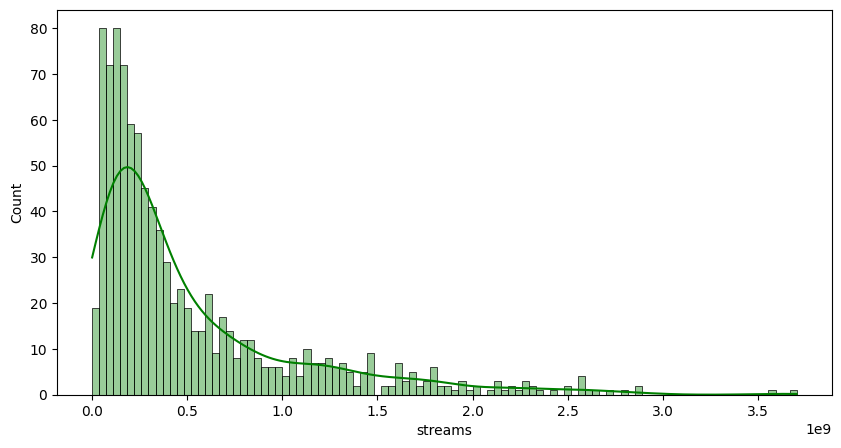

In [ ]:
# Provides the summary of streams
print(spotify_data['streams'].describe())

#plt.figure():is used to create a new figure
plt.figure(figsize=(10, 5))

#ploting a histogram
sns.histplot(data=spotify_data['streams'], color='g',bins=100, alpha=0.4, kde=True)

#display the created plot
plt.show()

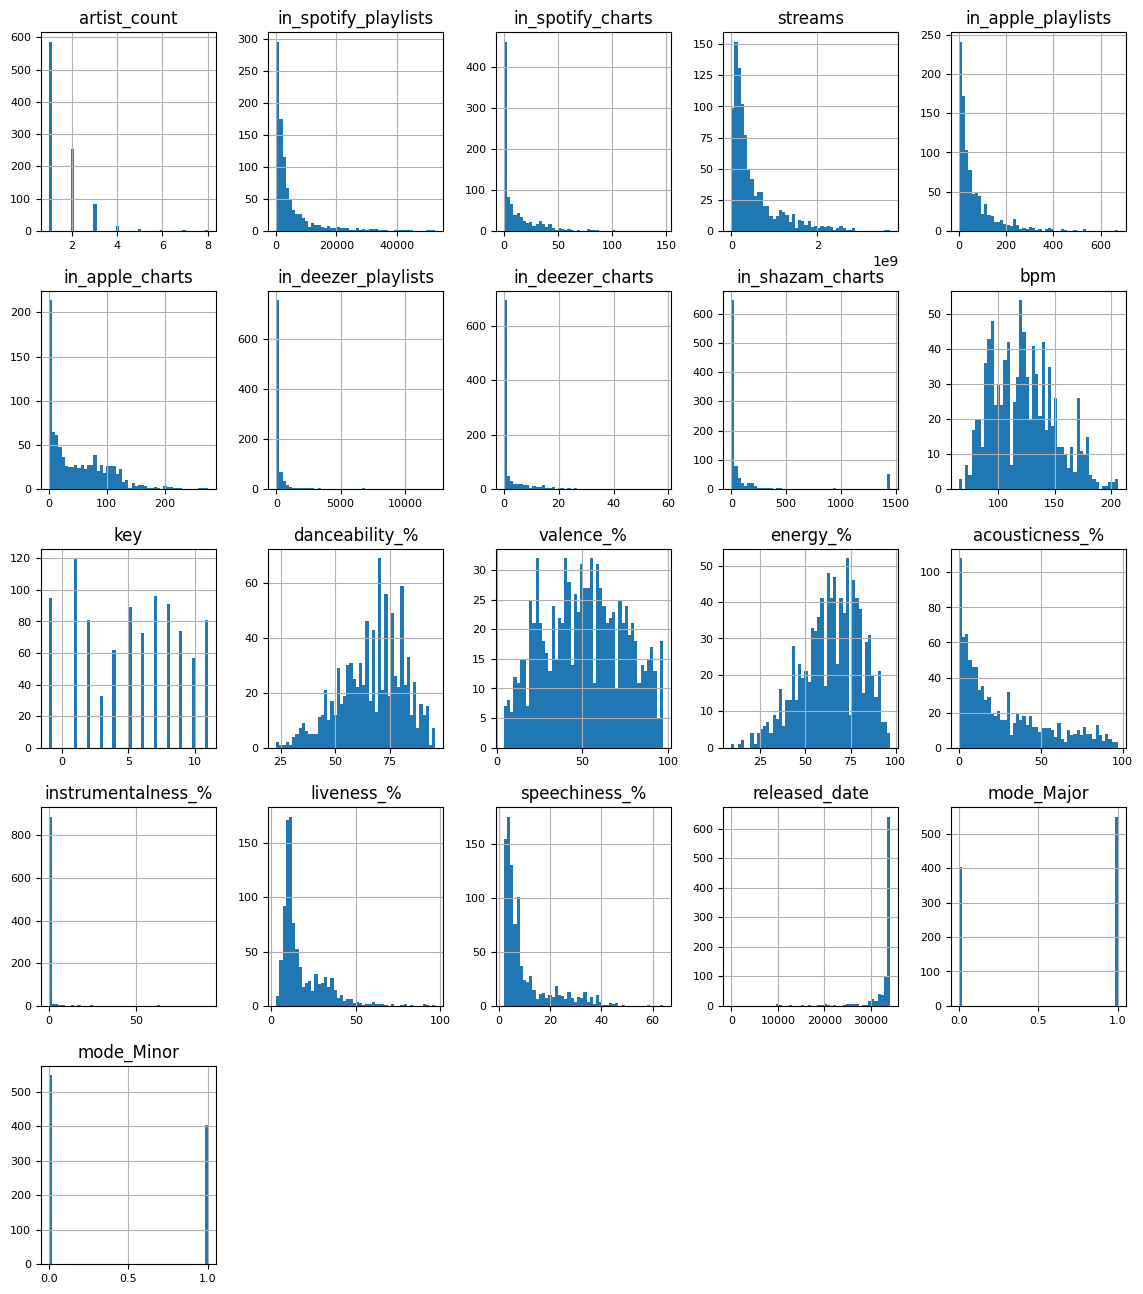

In [ ]:
# plotting all the histograms
spotify_data.hist(figsize=(14, 16), bins=50, xlabelsize=8, ylabelsize=8);

# Feature Engineering 🛠️🧩

1. 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists' are positively skewed indicating most tracks are included in fewer playlists, with some tracks being outliers with high inclusion counts.

<!-- 2. 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts' are similar to playlist inclusions, which are also positively skewed. -->

2. 'streams' is also highly positively skewed.

In order to reduce the dimensionality, I have combined 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists' into one column 'total_playlist'. And combined 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts' into one column 'total_charts'.

In [ ]:
spotify_data['total_playlist'] = spotify_data['in_spotify_playlists'] + \
                       spotify_data['in_apple_playlists'] + \
                       spotify_data['in_deezer_playlists']

spotify_data.drop(['in_spotify_playlists','in_apple_playlists','in_deezer_playlists'], axis=1, inplace=True)

In [ ]:
spotify_data['total_charts'] = spotify_data['in_spotify_charts'] + \
                 spotify_data['in_apple_charts'] + \
                 spotify_data['in_deezer_charts'] + \
                 spotify_data['in_shazam_charts']

spotify_data.drop(['in_spotify_charts','in_apple_charts','in_deezer_charts','in_shazam_charts'], axis=1, inplace=True)

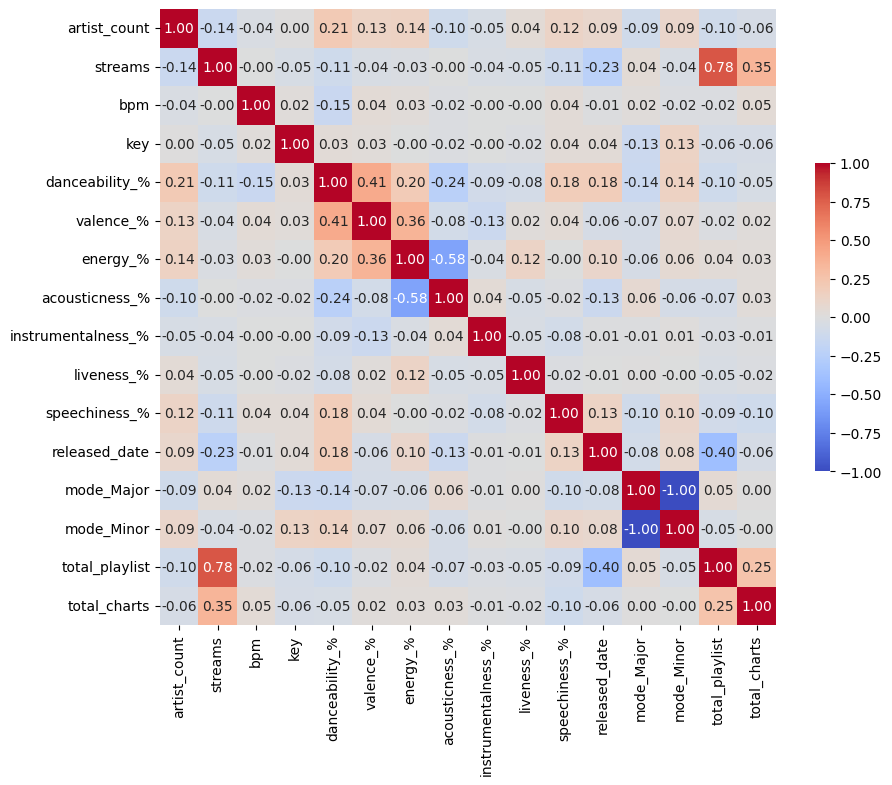

In [ ]:
# Correlation matrix
correlation_matrix = spotify_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})

# Show the plot
plt.show()

According to the correlation matrix:

1. There is strong positive correlation between 'total_playlist' and 'streams', this indicates that the song included in more playlist tend to have higher stream counts.
2. There is a moderate positive correlation between 'total_charts' and 'streams.

#Model Building and Evaluation 🤖📊

Since the dataset have many features and potential multicollinearity issues, and random forest can handle non-linear relationship.

In [ ]:
spotify_data.dtypes

artist_count          int64
streams               int64
bpm                   int64
key                   int64
danceability_%        int64
valence_%             int64
energy_%              int64
acousticness_%        int64
instrumentalness_%    int64
liveness_%            int64
speechiness_%         int64
released_date         int64
mode_Major            uint8
mode_Minor            uint8
total_playlist        int64
total_charts          int64
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [ ]:
# Set up Features and Target Variables
X = spotify_data.drop('streams', axis=1)
y = spotify_data['streams']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model evaluation for RandomForestRegressor
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print('RandomForestRegressor:')
print('mse: ', mse_rf)
print('r2: ', r2_rf)

RandomForestRegressor:
mse:  4.908498539663091e+16
r2:  0.799483546892173


In [ ]:
# XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Model evaluation for XGBRegressor
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print('\nXGBRegressor:')
print('mse: ', mse_xgb)
print('r2: ', r2_xgb)


XGBRegressor:
mse:  5.087952898819614e+16
r2:  0.7921526795603323


##GridSearch to optimize the hyperparameters.

In [ ]:
# RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Define X and y
X = spotify_data.drop('streams', axis=1)
y = spotify_data['streams']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Grid Search
grid_search.fit(X_train, y_train)

# After fitting, find the best parameters and evaluate the model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Output the best parameters
print("Best Parameters Found: ", best_params)

# Model Evaluation
y_pred = grid_search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('mse: ', mse)
r2 = r2_score(y_test, y_pred)
print('r2: ', r2)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters Found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
mse:  4.793956111184216e+16
r2:  0.8041627051527596


In [ ]:
# Feature importance
feature_importance = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
print(feature_importance.sort_values(ascending=False))

total_playlist        0.787188
released_date         0.087852
total_charts          0.026495
liveness_%            0.015512
energy_%              0.012489
valence_%             0.012364
bpm                   0.011967
acousticness_%        0.011952
danceability_%        0.011329
key                   0.009107
speechiness_%         0.006023
artist_count          0.003133
instrumentalness_%    0.002443
mode_Major            0.001074
mode_Minor            0.001073
dtype: float64


In [ ]:
# Save the model
import pickle
filename = 'spotify_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

# Load the model
loaded_model = pickle.load(open(filename, 'rb'))

# Take input dynamically
import pandas as pd
# Create an empty dataframe with the same columns as X
input_df = pd.DataFrame(columns=spotify_data.drop('streams', axis=1).columns)

# Ask the user to enter the values for each attribute
for col in input_df.columns:
    value = input(f'Enter the value for {col}: ')
    input_df.loc[0, col] = value
# Convert the input dataframe to numeric values
input_df = input_df.apply(pd.to_numeric)
# Predict the number of streams using the loaded model
prediction = loaded_model.predict(input_df)
print(f'The predicted number of streams for the song is {prediction[0]:.0f}')

Enter the value for artist_count: 1
Enter the value for bpm: 125
Enter the value for key: 2
Enter the value for danceability_%: 65
Enter the value for valence_%: 56
Enter the value for energy_%: 85
Enter the value for acousticness_%: 25
Enter the value for instrumentalness_%: 65
Enter the value for liveness_%: 98
Enter the value for speechiness_%: 65
Enter the value for released_date: 2024
Enter the value for mode_Major: 1
Enter the value for mode_Minor: 0
Enter the value for total_playlist: 1000
Enter the value for total_charts: 640
The predicted number of streams for the song is 548458111


##The predicted number of streams for the song is 548458111

In [ ]:
# # Create the scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.title('Comparison of Predicted and Actual Values')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red') # Diagonal line
# plt.show()